<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [4]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
Length: 71, dtype: int64

In [5]:
#Calculamos el numero total de la población "n"
Mexico['review_scores_location']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
23026 non-null  float64
dtypes: float64(1)
memory usage: 206.4 KB


In [6]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['review_scores_location'].max()
Min=Mexico['review_scores_location'].min()
Limites= [Min, Max]
Limites

[1.0, 5.0]

In [7]:
#Calculamos el rango R
R=Max-Min
R

4.0

In [8]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [9]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

0.2551056257663127

**Creación de Categorias a partir de clases**

In [10]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(.99, 5.1, 16)
intervalos

array([0.99 , 1.264, 1.538, 1.812, 2.086, 2.36 , 2.634, 2.908, 3.182,
       3.456, 3.73 , 4.004, 4.278, 4.552, 4.826, 5.1  ])

In [11]:
#Creamos las categorías 
categorias= ["Categoría1 (0-1.2 review_scores_location)", "Categoría2 (1.3-1.5 review_scores_location)","Categoría3 (1.6-1.8 review_scores_location)", "Categoría4 (1.9-2 review_scores_location)",
             "Categoría5 (2.1-2.3 review_scores_location)", "Categoría6 (2.4-2.6 review_scores_location)","Categoría7 (2.7-2.9 review_scores_location)", "Categoría8 (3-3.1 review_scores_location)", "Categoría9 (3.2-3.4 review_scores_location)", "Categoría10 (3.5-3.7 review_scores_location)","Categoría11 (3.8-4 review_scores_location)", "Categoría12 (4.1-4.2 review_scores_location)",
             "Categoría13 (4.3-4.5 review_scores_location)", "Categoría14 (4.6-4.8 review_scores_location)","Categoría15 (4.9-5.1 review_scores_location)"
             ]

In [12]:
#Finalmente creamos las categorías en la columna numérica
Mexico['review_scores_location']=pd.cut(x= Mexico['review_scores_location'], bins=intervalos, labels= categorias)
Mexico['review_scores_location']

0                                                 NaN
1        Categoría15 (4.9-5.1 review_scores_location)
2        Categoría14 (4.6-4.8 review_scores_location)
3        Categoría15 (4.9-5.1 review_scores_location)
4        Categoría15 (4.9-5.1 review_scores_location)
                             ...                     
26396      Categoría11 (3.8-4 review_scores_location)
26397                                             NaN
26398                                             NaN
26399                                             NaN
26400                                             NaN
Name: review_scores_location, Length: 26401, dtype: category
Categories (15, object): ['Categoría1 (0-1.2 review_scores_location)' < 'Categoría2 (1.3-1.5 review_scores_location)' < 'Categoría3 (1.6-1.8 review_scores_location)' < 'Categoría4 (1.9-2 review_scores_location)' ... 'Categoría12 (4.1-4.2 review_scores_location)' < 'Categoría13 (4.3-4.5 review_scores_location)' < 'Categoría14 (4.6-4.8 review_sc

In [13]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['review_scores_location'].value_counts().reset_index()
Tabla_freq

review_scores_location  count
0   Categoría15 (4.9-5.1 review_scores_location)  16624
1   Categoría14 (4.6-4.8 review_scores_location)   4645
2   Categoría13 (4.3-4.5 review_scores_location)   1046
3     Categoría11 (3.8-4 review_scores_location)    313
4   Categoría12 (4.1-4.2 review_scores_location)    179
5   Categoría10 (3.5-3.7 review_scores_location)     66
6      Categoría8 (3-3.1 review_scores_location)     62
7      Categoría1 (0-1.2 review_scores_location)     47
8      Categoría4 (1.9-2 review_scores_location)     18
9    Categoría9 (3.2-3.4 review_scores_location)     16
10   Categoría5 (2.1-2.3 review_scores_location)      4
11   Categoría6 (2.4-2.6 review_scores_location)      4
12   Categoría2 (1.3-1.5 review_scores_location)      1
13   Categoría7 (2.7-2.9 review_scores_location)      1
14   Categoría3 (1.6-1.8 review_scores_location)      0

In [14]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

review_scores_location  count
0   Categoría15 (4.9-5.1 review_scores_location)  16624
1   Categoría14 (4.6-4.8 review_scores_location)   4645
2   Categoría13 (4.3-4.5 review_scores_location)   1046
3     Categoría11 (3.8-4 review_scores_location)    313
4   Categoría12 (4.1-4.2 review_scores_location)    179
5   Categoría10 (3.5-3.7 review_scores_location)     66
6      Categoría8 (3-3.1 review_scores_location)     62
7      Categoría1 (0-1.2 review_scores_location)     47
8      Categoría4 (1.9-2 review_scores_location)     18
9    Categoría9 (3.2-3.4 review_scores_location)     16
10   Categoría5 (2.1-2.3 review_scores_location)      4
11   Categoría6 (2.4-2.6 review_scores_location)      4
12   Categoría2 (1.3-1.5 review_scores_location)      1
13   Categoría7 (2.7-2.9 review_scores_location)      1

In [15]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('review_scores_location')
Filtro_index

count
review_scores_location                             
Categoría15 (4.9-5.1 review_scores_location)  16624
Categoría14 (4.6-4.8 review_scores_location)   4645
Categoría13 (4.3-4.5 review_scores_location)   1046
Categoría11 (3.8-4 review_scores_location)      313
Categoría12 (4.1-4.2 review_scores_location)    179
Categoría10 (3.5-3.7 review_scores_location)     66
Categoría8 (3-3.1 review_scores_location)        62
Categoría1 (0-1.2 review_scores_location)        47
Categoría4 (1.9-2 review_scores_location)        18
Categoría9 (3.2-3.4 review_scores_location)      16
Categoría5 (2.1-2.3 review_scores_location)       4
Categoría6 (2.4-2.6 review_scores_location)       4
Categoría2 (1.3-1.5 review_scores_location)       1
Categoría7 (2.7-2.9 review_scores_location)       1

Text(0, 0.5, 'Frecuencia')

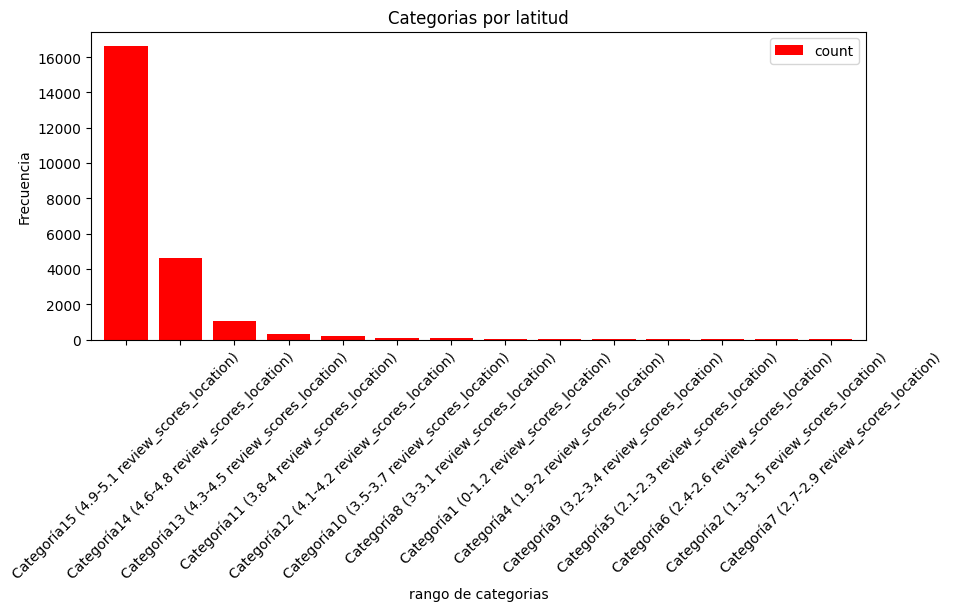

In [16]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')